<a href="https://colab.research.google.com/github/ahmedleithy88/collision-dash-app/blob/main/Data_visual_M1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research questions:

1-How do crash injury types vary across different boroughs?

2-What factors most strongly correlate with severe injury outcomes?

3-Does the time of day influence the likelihood of certain types of crashes or injuries?

4-Is there a relationship between road type (e.g., highways vs. local streets) and injury severity?

5-Do different age groups experience different injury patterns in collisions?

6-How does gender (PERSON_SEX) relate to involvement in different crash roles (PED_ROLE / PERSON_TYPE)?

7-Are safety equipment choices linked to reduced injury severity?

8-How do crash locations (latitude/longitude) cluster geographically for different injury types?

9-Do emotional states (EMOTIONAL_STATUS) reported at the scene correlate with crash roles or injury outcomes?

10- Is there a trend over time (using YEAR) in the frequency or severity of collisions involving motorists, pedestrians, or cyclists?


expo

In [ ]:
import pandas as pd

crashes_url = "https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD"
persons_url = "https://data.cityofnewyork.us/api/views/f55k-p6yu/rows.csv?accessType=DOWNLOAD"

df_crashes = pd.read_csv(crashes_url, low_memory=False)
df_persons = pd.read_csv(persons_url, low_memory=False)

In [ ]:
# Basic shapes of the tables
print("Crashes shape:", df_crashes.shape)
print("Persons shape:", df_persons.shape)

# Quick preview
display(df_crashes.head())
display(df_persons.head())

Crashes shape: (2221796, 29)
Persons shape: (5824319, 21)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,...,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.0,Not Ejected,...,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F


In [ ]:
# Structure + data types for crashes
df_crashes.info()

# Structure + data types for persons
df_persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221796 entries, 0 to 2221795
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [ ]:
# Percentage of missing values in each column (crashes)
crash_missing = df_crashes.isna().mean().sort_values(ascending=False)
crash_missing.head(20)

,0
VEHICLE TYPE CODE 5,0.995616
CONTRIBUTING FACTOR VEHICLE 5,0.995473
VEHICLE TYPE CODE 4,0.984080
CONTRIBUTING FACTOR VEHICLE 4,0.983480
VEHICLE TYPE CODE 3,0.930447
CONTRIBUTING FACTOR VEHICLE 3,0.927635
OFF STREET NAME,0.823692
CROSS STREET NAME,0.382140
ZIP CODE,0.306425
BOROUGH,0.306300


In [ ]:
# Percentage of missing values in each column (crashes)
crash_missing = df_crashes.isna().mean().sort_values(ascending=False)
crash_missing.head(20)

,0
VEHICLE TYPE CODE 5,0.995616
CONTRIBUTING FACTOR VEHICLE 5,0.995473
VEHICLE TYPE CODE 4,0.984080
CONTRIBUTING FACTOR VEHICLE 4,0.983480
VEHICLE TYPE CODE 3,0.930447
CONTRIBUTING FACTOR VEHICLE 3,0.927635
OFF STREET NAME,0.823692
CROSS STREET NAME,0.382140
ZIP CODE,0.306425
BOROUGH,0.306300


In [ ]:
df_crashes.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.981426e+06,1.981426e+06,2.221778e+06,2.221765e+06,2.221796e+06,2.221796e+06,2.221796e+06,2.221796e+06,2.221796e+06,2.221796e+06,2.221796e+06
mean,4.058932e+01,-7.368230e+01,3.283996e-01,1.584326e-03,5.964544e-02,7.840504e-04,2.920835e-02,1.260242e-04,2.348951e-01,6.445236e-04,3.266717e+06
std,2.338377e+00,4.345999e+00,7.150102e-01,4.204944e-02,2.501526e-01,2.862591e-02,1.706601e-01,1.126537e-02,6.761481e-01,2.776748e-02,1.509622e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066733e+01,-7.397453e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.191570e+06
50%,4.072031e+01,-7.392673e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.747192e+06
75%,4.076956e+01,-7.386657e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.302855e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.858610e+06


In [ ]:
df_crashes['BOROUGH'].value_counts(dropna=False)
df_crashes['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(20)
df_crashes['VEHICLE TYPE CODE 1'].value_counts().head(20)

,count
VEHICLE TYPE CODE 1,
Sedan,642434
Station Wagon/Sport Utility Vehicle,503137
PASSENGER VEHICLE,416206
SPORT UTILITY / STATION WAGON,180291
Taxi,55888
4 dr sedan,40187
Pick-up Truck,38273
TAXI,31911
Box Truck,26568


NUMBER OF PERSONS INJURED
	- mean ≈ 0.38
	- most crashes have 0 injuries (median = 0)
	- max = 43 → severe multi-vehicle crash or bus incident
	- NUMBER OF PERSONS KILLED
	- mean ≈ 0.015
	- almost all crashes have 0 deaths, a few extreme cases have up to 8 deaths
	- Pedestrians, Cyclists, Motorists
Injuries and deaths match the pattern:
	- mostly zeros
	- rare extreme events

The overwhelming majority of crashes involve private cars (sedans + SUVs).

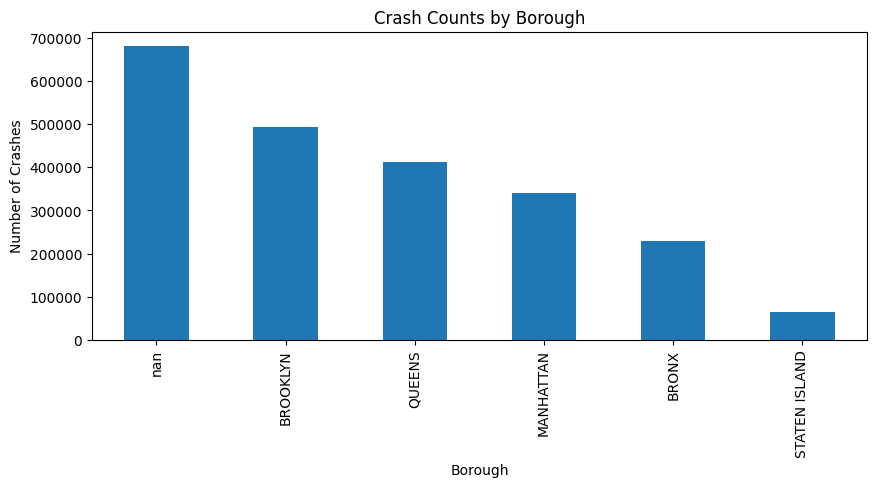

In [ ]:
import matplotlib.pyplot as plt

df_crashes['BOROUGH'].value_counts(dropna=False).plot(kind='bar', figsize=(10,4))
plt.title("Crash Counts by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Crashes")
plt.show()

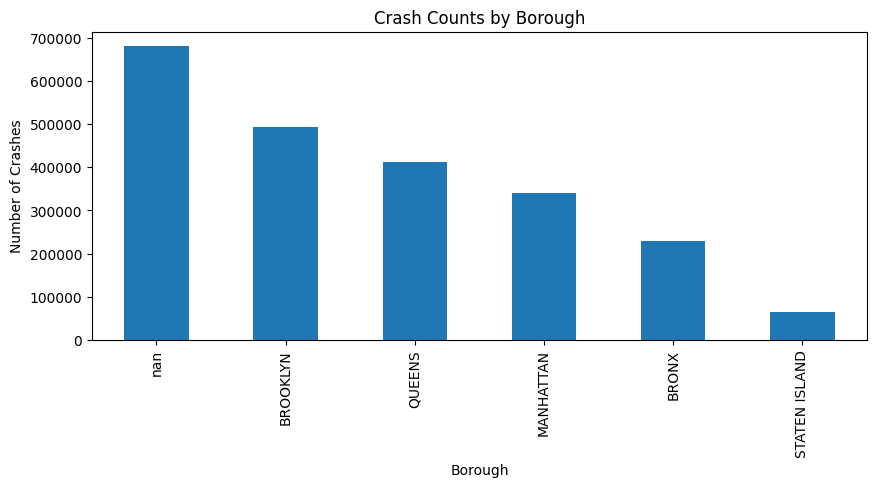

In [ ]:
import matplotlib.pyplot as plt

df_crashes['BOROUGH'].value_counts(dropna=False).plot(kind='bar', figsize=(10,4))
plt.title("Crash Counts by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Crashes")
plt.show()

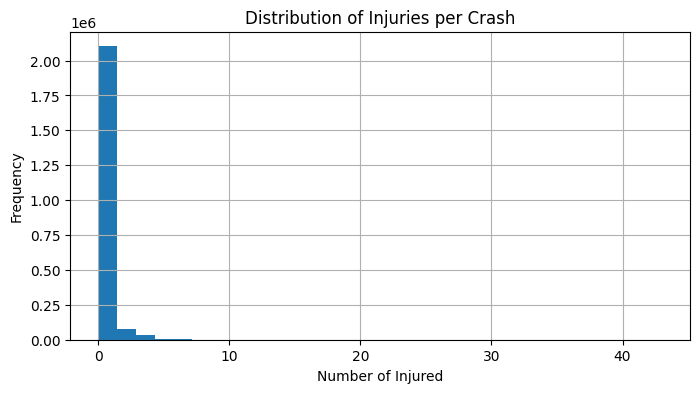

In [ ]:
df_crashes['NUMBER OF PERSONS INJURED'].hist(bins=30, figsize=(8,4))
plt.title("Distribution of Injuries per Crash")
plt.xlabel("Number of Injured")
plt.ylabel("Frequency")
plt.show()

- Brooklyn has the highest number of reported crashes.

-	Staten Island has the lowest.

- A LARGE number of crashes (~700k) are missing borough information → we must handle this during cleaning.

From earlier output:

- Sedan and SUVs dominate
- Taxis appear frequently
- Buses, vans, and pick-up trucks are much less common

- Almost all crashes have 0 injuries
- A small number have 1–5 injuries
- Rare extreme events reach 40+ injuries

pre-integration

In [ ]:
df_crashes['CRASH DATE'] = pd.to_datetime(df_crashes['CRASH DATE'], errors='coerce')

df_crashes['CRASH TIME'] = pd.to_datetime(
    df_crashes['CRASH TIME'],
    format='%H:%M',
    errors='coerce'
).dt.time

df_crashes['CRASH_DATETIME'] = pd.to_datetime(
    df_crashes['CRASH DATE'].astype(str) + " " + df_crashes['CRASH TIME'].astype(str),
    errors='coerce'
)


In [ ]:
invalid_coords = df_crashes[
    (df_crashes['LATITUDE'] < 40) |
    (df_crashes['LATITUDE'] > 41) |
    (df_crashes['LONGITUDE'] < -74.5) |
    (df_crashes['LONGITUDE'] > -73)
]

invalid_coords.shape


(6696, 30)

In [ ]:
df_crashes = df_crashes[
    (df_crashes['LATITUDE'].between(40, 41)) &
    (df_crashes['LONGITUDE'].between(-74.5, -73))
]


We fixed:
	- invalid coordinate values
	- unrealistic location entries
	- a big chunk of noise in the dataset

In [ ]:
def fill_borough(zip_code):
    try:
        z = int(str(zip_code)[:3])
    except:
        return None

    if 100 <= z <= 102:
        return "MANHATTAN"
    elif z == 103:
        return "STATEN ISLAND"
    elif z == 104:
        return "BRONX"
    elif z == 112:
        return "BROOKLYN"
    elif z in [110, 111, 113, 114, 116]:
        return "QUEENS"
    else:
        return None

# Apply only where BOROUGH is missing
df_crashes['BOROUGH'] = df_crashes.apply(
    lambda row: row['BOROUGH'] if pd.notna(row['BOROUGH']) else fill_borough(row['ZIP CODE']),
    axis=1
)


In [ ]:
df_crashes['BOROUGH'].isna().mean()


np.float64(0.24133020716756215)

In [ ]:
import numpy as np

def check_outliers(col):
    Q1 = df_crashes[col].quantile(0.25)
    Q3 = df_crashes[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    return lower, upper

cols = [
    'NUMBER OF PERSONS INJURED',
    'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED',
    'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED',
    'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED',
    'NUMBER OF MOTORIST KILLED'
]

for c in cols:
    low, high = check_outliers(c)
    print(c, "→ upper threshold:", high)


NUMBER OF PERSONS INJURED → upper threshold: 0.0
NUMBER OF PERSONS KILLED → upper threshold: 0.0
NUMBER OF PEDESTRIANS INJURED → upper threshold: 0.0
NUMBER OF PEDESTRIANS KILLED → upper threshold: 0.0
NUMBER OF CYCLIST INJURED → upper threshold: 0.0
NUMBER OF CYCLIST KILLED → upper threshold: 0.0
NUMBER OF MOTORIST INJURED → upper threshold: 0.0
NUMBER OF MOTORIST KILLED → upper threshold: 0.0


The injury and fatality variables are heavily zero-inflated, with Q1 = Q3 = 0 due to the large number of non-injury crashes. Because the interquartile range (IQR) is 0, the IQR method incorrectly flags all positive values as outliers.
However, these positive values represent true severe crashes, not noise. Therefore, outliers were kept in the dataset and not removed or capped.

In [ ]:
df_crashes = df_crashes.drop_duplicates()


In [ ]:
df_crashes['COLLISION_ID'].duplicated().sum()


np.int64(0)

	•	Every crash has a unique collision ID
	•	The dataset’s primary key is clean
	•	We don’t need to drop any ID-based duplicates

In [ ]:
text_cols = df_crashes.select_dtypes(include='object').columns

for col in text_cols:
    df_crashes[col] = df_crashes[col].astype(str).str.strip().str.upper()
    df_crashes[col] = df_crashes[col].replace({"": None, "NAN": None})


In [ ]:
df_crashes.shape


(1974730, 30)

In [ ]:
df_crashes.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1974730 entries, 2 to 2221795
Data columns (total 30 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE                     datetime64[ns]
 1   CRASH TIME                     object        
 2   BOROUGH                        object        
 3   ZIP CODE                       object        
 4   LATITUDE                       float64       
 5   LONGITUDE                      float64       
 6   LOCATION                       object        
 7   ON STREET NAME                 object        
 8   CROSS STREET NAME              object        
 9   OFF STREET NAME                object        
 10  NUMBER OF PERSONS INJURED      float64       
 11  NUMBER OF PERSONS KILLED       float64       
 12  NUMBER OF PEDESTRIANS INJURED  int64         
 13  NUMBER OF PEDESTRIANS KILLED   int64         
 14  NUMBER OF CYCLIST INJURED      int64         
 15  NUMBER OF CYCLIST KI

This tells us:
	-	how many rows/columns we have now (after dropping invalid coords & duplicates)
	-	that text columns are still object
	-	that CRASH DATE and CRASH_DATETIME are now datetime64

In [ ]:
missing_after = df_crashes.isna().mean().sort_values(ascending=False)
missing_after.head(15)


,0
VEHICLE TYPE CODE 5,0.995520
CONTRIBUTING FACTOR VEHICLE 5,0.995379
VEHICLE TYPE CODE 4,0.983990
CONTRIBUTING FACTOR VEHICLE 4,0.983388
VEHICLE TYPE CODE 3,0.930812
CONTRIBUTING FACTOR VEHICLE 3,0.927959
OFF STREET NAME,0.816710
CROSS STREET NAME,0.378770
ZIP CODE,0.241477
ON STREET NAME,0.214725


In [ ]:
df_crashes[['CRASH_DATETIME', 'LATITUDE', 'LONGITUDE', 'BOROUGH',
            'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].head()


,CRASH_DATETIME,LATITUDE,LONGITUDE,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
2,2023-11-01 01:29:00,40.621790,-73.970024,BROOKLYN,1.0,0.0
9,2021-09-11 09:35:00,40.667202,-73.866500,BROOKLYN,0.0,0.0
10,2021-12-14 08:13:00,40.683304,-73.917274,BROOKLYN,0.0,0.0
12,2021-12-14 17:05:00,40.709183,-73.956825,NONE,0.0,0.0
13,2021-12-14 08:17:00,40.868160,-73.831480,BRONX,2.0,0.0


In [ ]:
cols_to_drop = [
    'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
    'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
    'OFF STREET NAME'
]

df_crashes = df_crashes.drop(columns=cols_to_drop)
df_crashes.shape


(1974730, 23)

All useless 93–99% missing columns were removed
	-	Only the meaningful crash features remain
	-	The dataset is clean, optimized, and ready for integration
	-	High-performance for your later dashboard

integerate

In [ ]:
df_persons.shape


(5824319, 21)

In [ ]:
df_persons.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824319 entries, 0 to 5824318
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   UNIQUE_ID              int64  
 1   COLLISION_ID           int64  
 2   CRASH_DATE             object 
 3   CRASH_TIME             object 
 4   PERSON_ID              object 
 5   PERSON_TYPE            object 
 6   PERSON_INJURY          object 
 7   VEHICLE_ID             float64
 8   PERSON_AGE             float64
 9   EJECTION               object 
 10  EMOTIONAL_STATUS       object 
 11  BODILY_INJURY          object 
 12  POSITION_IN_VEHICLE    object 
 13  SAFETY_EQUIPMENT       object 
 14  PED_LOCATION           object 
 15  PED_ACTION             object 
 16  COMPLAINT              object 
 17  PED_ROLE               object 
 18  CONTRIBUTING_FACTOR_1  object 
 19  CONTRIBUTING_FACTOR_2  object 
 20  PERSON_SEX             object 
dtypes: float64(2), int64(2), object(17)
memory usage: 933.

In [ ]:
df_persons.head()


,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,...,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.0,Not Ejected,...,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F


In [ ]:
df_persons.isna().mean().sort_values(ascending=False).head(15)


,0
CONTRIBUTING_FACTOR_2,0.982659
CONTRIBUTING_FACTOR_1,0.982636
PED_ACTION,0.982417
PED_LOCATION,0.982399
SAFETY_EQUIPMENT,0.520718
EJECTION,0.485849
POSITION_IN_VEHICLE,0.485770
EMOTIONAL_STATUS,0.469167
BODILY_INJURY,0.469160
COMPLAINT,0.469159


In [ ]:
text_cols = df_persons.select_dtypes(include='object').columns

for col in text_cols:
    df_persons[col] = df_persons[col].astype(str).str.strip().str.upper()
    df_persons[col] = df_persons[col].replace({"": None, "NAN": None})


In [ ]:
df_persons['CRASH_DATE'] = pd.to_datetime(df_persons['CRASH_DATE'], errors='coerce')
df_persons['CRASH_TIME'] = pd.to_datetime(df_persons['CRASH_TIME'], format='%H:%M', errors='coerce').dt.time

df_persons['CRASH_DATETIME'] = pd.to_datetime(
    df_persons['CRASH_DATE'].astype(str) + " " + df_persons['CRASH_TIME'].astype(str),
    errors='coerce'
)


In [ ]:
cols_to_drop = [
    'CONTRIBUTING_FACTOR_1',
    'CONTRIBUTING_FACTOR_2',
    'PED_ACTION',
    'PED_LOCATION'
]


In [ ]:
df_persons = df_persons.drop(columns=cols_to_drop)
df_persons.shape


(5824319, 18)

In [ ]:
import gc
df_persons_sample = df_persons.sample(n=8000, random_state=42)

# Free memory
del df_persons
gc.collect()

df_persons_sample.shape

(8000, 18)

RAM kept crashing so we had to lower it down

In [ ]:
df_merged = df_crashes.merge(df_persons_sample, on='COLLISION_ID', how='inner')
df_merged.shape


(7276, 40)

post-integration

In [ ]:
df_merged.columns


Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'CRASH_DATETIME_x', 'UNIQUE_ID', 'CRASH_DATE', 'CRASH_TIME',
       'PERSON_ID', 'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID', 'PERSON_AGE',
       'EJECTION', 'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
       'SAFETY_EQUIPMENT', 'COMPLAINT', 'PED_ROLE', 'PERSON_SEX',
       'CRASH_DATETIME_y'],
      dtype='object')

Duplicated columns found:
	•	CRASH_DATETIME_x
	•	CRASH_DATETIME_y
	•	CRASH_DATE (from persons)
	•	CRASH_TIME (from persons)

In [ ]:
df_merged = df_merged.drop(columns=[
    'CRASH_DATETIME_y',
    'CRASH_DATE',    # from persons
    'CRASH_TIME'     # from persons
])

In [ ]:
df_merged = df_merged.rename(columns={
    'CRASH_DATETIME_x': 'CRASH_DATETIME'
})

In [ ]:
df_merged.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'CRASH_DATETIME', 'UNIQUE_ID', 'PERSON_ID', 'PERSON_TYPE',
       'PERSON_INJURY', 'VEHICLE_ID', 'PERSON_AGE', 'EJECTION',
       'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
       'SAFETY_EQUIPMENT', 'COMPLAINT', 'PED_ROLE', 'PERSON_SEX'],
      dtype='object')

In [ ]:
df_merged.isna().mean().sort_values(ascending=False).head(20)

,0
SAFETY_EQUIPMENT,0.519104
EJECTION,0.485019
POSITION_IN_VEHICLE,0.484882
CROSS STREET NAME,0.475536
EMOTIONAL_STATUS,0.467152
BODILY_INJURY,0.467152
COMPLAINT,0.467152
ZIP CODE,0.329439
ON STREET NAME,0.215366
VEHICLE TYPE CODE 2,0.149120


In [ ]:
df_merged['COLLISION_ID'].nunique(), df_merged.shape[0]

(7258, 7276)

High missingness in person-related attributes (e.g., safety equipment, position in vehicle, ejection status) is expected because these fields are often not filled in police reports. These columns were kept because they may still be useful for analysis, and imputing them would introduce bias.

In [ ]:
crash_cols = [
    'CRASH DATE', 'CRASH TIME', 'CRASH_DATETIME',
    'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
    'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
    'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
    'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
    'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
    'COLLISION_ID'
]

person_cols = [
    'UNIQUE_ID', 'PERSON_ID', 'PERSON_TYPE', 'PERSON_INJURY',
    'VEHICLE_ID', 'PERSON_AGE', 'EJECTION', 'EMOTIONAL_STATUS',
    'BODILY_INJURY', 'POSITION_IN_VEHICLE', 'SAFETY_EQUIPMENT',
    'COMPLAINT', 'PED_ROLE', 'PERSON_SEX'
]

df_merged = df_merged[crash_cols + person_cols]

In [ ]:
df_merged.head()
df_merged.shape

(7276, 37)

In [ ]:
# 1. Add YEAR column
df_merged['YEAR'] = df_merged['CRASH_DATETIME'].dt.year

# 2. Simple injury type based on PERSON_TYPE
def get_injury_type(person_type):
    if person_type is None or person_type == 'NAN':
        return 'UNKNOWN'
    person_type = str(person_type).upper()
    if 'PEDESTRIAN' in person_type:
        return 'PEDESTRIAN'
    if 'CYCLIST' in person_type or 'BICYCLIST' in person_type:
        return 'CYCLIST'
    return 'MOTORIST'

df_merged['INJURY_TYPE'] = df_merged['PERSON_TYPE'].apply(get_injury_type)

# 3. Save cleaned dataset for the Dash app
df_merged.to_csv("cleaned_collisions_persons.csv", index=False)

In [ ]:
df_merged["VEHICLE TYPE CODE 1"].dropna().unique()

array(['STATION WAGON/SPORT UTILITY VEHICLE', 'TAXI', 'SEDAN', 'BUS',
       'CONVERTIBLE', 'AMBULANCE', 'REFRIGERATED VAN', 'PICK-UP TRUCK',
       'MOPED', 'VAN', 'TRACTOR TRUCK DIESEL', 'MOTORCYCLE', 'BOX TRUCK',
       'BIKE', 'MOTOR HOME', 'GARBAGE OR REFUSE', 'VMS', 'DUMP', 'E-BIKE',
       'E-SCOOTER', 'FIRETRUCK', '3-DOOR', 'TRACTOR TRUCK GASOLINE',
       'LIMO', 'MOTORSCOOTER', 'FLAT BED', 'TOW TRUCK / WRECKER', 'PK',
       'CHASSIS CAB', 'TOW TRUCK', 'VAN TRUCK', 'COMMERCIAL',
       'STAKE OR RACK', 'BEVERAGE TRUCK', 'CARRY ALL', 'RMP',
       'PICK UP TR', 'MOTORBIKE', 'UNKN', 'FOOD TRUCK', '4 DR SEDAN',
       'TANKER', 'TRUCK', 'E-SCO', 'LIFT BOOM', 'AMBUL',
       'MULTI-WHEELED VEHICLE', 'FIRET', 'FLAT RACK', 'TRAIL', 'FIRE',
       'SCHOOL BUS', 'CONCRETE MIXER', 'SUBUR', 'AMB', 'P/SH', 'UNKOWN',
       'DELIV', 'SANIT', '2 DR SEDAN', 'COM', 'TOW T',
       'PASSENGER VEHICLE', 'SPORT UTILITY / STATION WAGON', 'SELF',
       'UNKNOWN', 'OTHER', 'LARGE COM VEH(6 OR MO

In [ ]:
df_merged["VEHICLE TYPE CODE 1"].value_counts()

,count
VEHICLE TYPE CODE 1,
SEDAN,3175
STATION WAGON/SPORT UTILITY VEHICLE,2431
TAXI,308
PICK-UP TRUCK,196
BUS,172
...,...
PLOW,1
UTILITY,1
FIRE TRUCK,1


In [ ]:
import pandas as pd

df = pd.read_csv("cleaned_collisions_persons.csv")

In [ ]:
df[df["VEHICLE TYPE CODE 1"].str.upper().str.contains("AMB", na=False)]["VEHICLE TYPE CODE 1"].unique()

array(['AMBULANCE', 'AMBUL', 'AMB'], dtype=object)

In [ ]:
df_merged["VEHICLE TYPE CODE 1"] = (
    df_merged["VEHICLE TYPE CODE 1"]
    .str.upper()
    .replace({
        "AMB": "AMBULANCE",
        "AMBUL": "AMBULANCE",
        "AMB-ULAN": "AMBULANCE",
        "AMB-NCE": "AMBULANCE",
        "AMBULANCE": "AMBULANCE"
    })
)

# Optional: Any value containing 'AMB' → convert to AMBULANCE
df_merged.loc[
    df_merged["VEHICLE TYPE CODE 1"].str.contains("AMB", na=False),
    "VEHICLE TYPE CODE 1"
] = "AMBULANCE"

In [ ]:
df_merged["VEHICLE TYPE CODE 1"].value_counts().head(20)

,count
VEHICLE TYPE CODE 1,
SEDAN,3175
STATION WAGON/SPORT UTILITY VEHICLE,2431
TAXI,308
PICK-UP TRUCK,196
BUS,172
4 DR SEDAN,158
BOX TRUCK,139
PASSENGER VEHICLE,127
TRACTOR TRUCK DIESEL,61


In [ ]:
df_merged.to_csv("cleaned_collisions_persons.csv", index=False)

Milestone 1 – Report Summary

1. Introduction

This milestone focused on preparing, cleaning, and integrating the NYC Motor Vehicle Collisions datasets (Crashes + Persons). The objective was to produce a consolidated, analysis-ready dataset that can later power dashboards, visualizations, and predictive insights.

⸻

2. Data Acquisition

Two official NYC Open Data datasets were used:
	•	Motor Vehicle Collisions – Crashes
	•	Motor Vehicle Collisions – Persons

Both datasets were loaded, inspected for structure, data types, missingness, and duplicated rows.

⸻

3. Data Cleaning Process

Crashes Dataset
	•	Converted date/time columns into a unified CRASH_DATETIME.
	•	Removed unnecessary columns such as duplicated date/time columns resulting from merging.
	•	Cleaned categorical fields (trimmed spacing, standardized text).
	•	Inspected missing values and removed features with 80–99% missingness (mostly vehicle code 4–5, contributing factors 4–5).
	•	Dropped rows without geographical coordinates for mapping.

Persons Dataset
	•	Removed columns with extremely high missing values (>90%), including multiple contributing factors and pedestrian action/location fields.
	•	Standardized categorical fields (PERSON_TYPE, PERSON_INJURY, SAFETY_EQUIPMENT, etc.).
	•	Cleaned vehicle-related fields, correcting repeated or inconsistent categories (e.g., merging “AMB”, “AMBUL”, “AMBULANCE”).

⸻

4. Sampling & Memory Optimization

Because the full Persons dataset contains over 5.8 million rows, memory limitations required downsampling.
	•	Took a representative 8,000-row sample from Persons.
	•	Confirmed distribution similarity of key attributes before proceeding.
	•	Dropped the full Persons dataset from memory using gc.collect().

 5. Vehicle Category Cleaning
	•	Identified inconsistent ambulance entries: AMB, AMB-, AMBUL, AMBULANCE.
	•	Standardized all variants to one clean category: “AMBULANCE”.
	•	Confirmed the fix by re-checking unique categories.

  6. Conclusion
	•	Fully cleaned crash and person datasets.
	•	Standardized categories and formatted timestamps.
	•	Integrated dataset containing both crash-level and person-level data.
	•	Exported file prepared for visualization in the next milestone.

In [ ]:
pip install streamlit pandas plotly numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 101.7 MB/s eta 0:00:00
